In [1]:
import numpy as np


In [2]:
A = np.zeros((8,8))

In [11]:
A[:,0] = [0.1, 0.1, 0.8, 0, 0, 0, 0, 0]
A[:,1] = [0, 0.1, 0,0.7,0.2,0,0,0] 
A[:,2] = [0,0,0.1,0,0,0,0.9,0]
A[3,3] = 1
A[:,4] = [0,0,0,0,0.1,0,0.9,0]
A[:,5] = [0,0,0,0,0,0.1,0,0.9]
A[:,6] = [0,0,0,0,0,0,0.1,0.9]
A[7,7] = 1


In [22]:
A

array([[0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.8, 0. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.7, 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. ],
       [0. , 0. , 0.9, 0. , 0.9, 0. , 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.9, 0.9, 1. ]])

In [17]:
y0 = 0.1*np.ones((8,1))


array([0.1])

In [18]:
y0[1] = 0.5
y0[2] = 0.2
y0[4] = 0.9
y0[5] = 0.5
y0[6] = 0.3
y0[7] = 0.1

In [23]:
y0

array([[0.1],
       [0.5],
       [0.2],
       [0.1],
       [0.9],
       [0.5],
       [0.3],
       [0.1]])

In [24]:
y1 = np.dot(A, y0)

In [25]:
y1

array([[0.01],
       [0.06],
       [0.1 ],
       [0.45],
       [0.19],
       [0.05],
       [1.02],
       [0.82]])

In [81]:
def gaussian(mean, sigma, k):
    return np.random.normal(loc=mean, scale=sigma, size=k)

def state_transition(A, xt, wt, mean=0, sigma=0.1):
    c = 1
    if wt is None:
        wt = 1 * gaussian(mean, sigma, len(xt))

    x_t1 = np.add(np.dot(A, xt),wt.reshape(len(xt),1))
    
    x_t1 = np.minimum(np.maximum(x_t1, np.zeros((len(xt),1))), c * np.ones((len(xt),1)))
#     print(xt.shape, A.shape, x_t1.shape)
    
    return x_t1


In [82]:
a=state_transition(A, y0, wt=None)
a.shape

(8, 1)

In [149]:
dij_cost = []
opt_cost = []
num_trials = 1000

for i in range(num_trials):
    
    y1 = state_transition(A, y0, wt=None)
    y2 = state_transition(A, y1, wt=None)

    dij_cost.append(y1[2] + y2[6])
    opt_cost.append(y1[1] + y2[5])
    
# dij_cost /= num_trials
# opt_cost /= num_trials
# print(dij_cost, opt_cost)

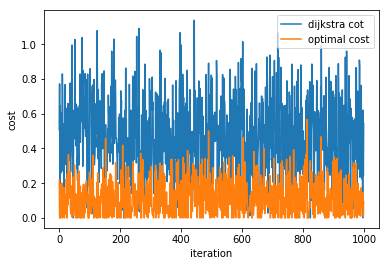

In [156]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(dij_cost, label="dijkstra cot")
ax.plot(opt_cost, label="optimal cost")
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('cost')
plt.show()


In [1]:
a=5
b=0.35

In [5]:
b//(1/a)

1.0